In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as sts
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.utils import shuffle


from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

import warnings 
warnings.filterwarnings('ignore')
RANDOM_STATE = 80822

## Загрузка и просмотр данных.

In [10]:
try:
    phone = pd.read_csv('/datasets/phone.csv')
    contract = pd.read_csv('/datasets/contract.csv')
    personal = pd.read_csv('/datasets/personal.csv')
    internet = pd.read_csv('/datasets/internet.csv')
except:
    print('Проверьте путь к данным')

In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
#функция для открытия таблиц и информации о них:
def info(df, name):
    print('\033[1m' + 'Таблица '+ name + '\033[0m')
    print('')
    print('Первые 10 строк таблицы:')
    display(df.head(10))
    print('Рандомные 10 строк таблицы:')
    display(df.sample(10, random_state=1))
    print('Последние 10 строк таблицы:')
    display(df.tail(10))
    print('Информация')
    print('')
    print(df.info())

**1) CONTRACT**

In [13]:
info(contract, 'CONTRACT, информация о договоре')

Таблица CONTRACT, информация о договоре

Первые 10 строк таблицы:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


Рандомные 10 строк таблицы:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3381,8879-ZKJOF,2016-09-01,No,One year,Yes,Bank transfer (automatic),79.85,3320.75
6180,0201-MIBOL,2014-08-01,No,Two year,Yes,Bank transfer (automatic),102.40,6471.85
4829,1600-DILPE,2019-02-01,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3737,8601-QACRS,2019-07-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,50.60,249.95
4249,7919-ZODZZ,2019-04-01,No,One year,Yes,Mailed check,65.90,660.05
6835,7964-ZRKKG,2014-07-01,No,One year,Yes,Bank transfer (automatic),88.40,5798.3
3869,1357-BIJKI,2015-12-01,No,One year,Yes,Electronic check,98.25,4858.7
3943,8720-RQSBJ,2020-01-01,No,Month-to-month,No,Electronic check,44.00,44
3491,4682-BLBUC,2016-06-01,No,One year,Yes,Electronic check,70.95,3250.45
6847,8930-XOTDP,2018-08-01,No,Month-to-month,No,Mailed check,55.95,1082.8


Последние 10 строк таблицы:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7033,9767-FFLEM,2016-12-01,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25
7034,0639-TSIQW,2014-03-01,2019-10-01 00:00:00,Month-to-month,Yes,Credit card (automatic),102.95,6886.25
7035,8456-QDAVC,2018-07-01,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1
7036,7750-EYXWZ,2019-02-01,No,One year,No,Electronic check,60.65,743.3
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.4
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


Информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


In [14]:
contract.duplicated().sum()

0

Пропусков и дубликатов нет, рассмотрим таблицу подробнее:
- `customerID`-идентификатор пользователя;

- `BeginDate`-дата подключения клиента, тип данных _object_, необходимо будет изменить на _datetime_;

- `EndDate`- дата ухода пользователя. Столбец хранит дату прекращения договора, либо значение "No", если клиент все еще пользуется услугами оператора на 1 февраля 2020.

- `Type`- тип оплаты (помесячная, годовая, двухгодовая);

- `PaperlessBilling`- онлайн-чеки;

- `PaymentMethod`- метод оплаты;

- `MonthlyCharges`- ежемесячная плата;

- `TotalCharges`- общая сумма, потраченная клиентом, тип данных _object_, необходимо рассмотреть поближе и поменять на численный.



In [15]:
print('Количество уникальных пользователей: ', len(contract['customerID'].unique()))

Количество уникальных пользователей:  7043


In [16]:
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')

In [17]:
nans=contract.query('TotalCharges == " "')
display(nans)
display(len(nans))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


11

Колонка `TotalCharges` имеет тип данных _object_ из-за пробелов не получится изменить тип. Пропущенных значений всего 11, поэтому можем их удалить.

In [18]:
contract=contract.query('TotalCharges != " "')

In [19]:
contract['TotalCharges'] = contract['TotalCharges'].astype('float64')
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 494.4+ KB


In [20]:
contract['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

Признак `PaperlessBilling` бинарный, можно его закодировать, присвоив значениям Yes и No 1 и 0 соответственно.

In [21]:
contract['PaperlessBilling']=contract['PaperlessBilling'].replace('No', 0)
contract['PaperlessBilling']=contract['PaperlessBilling'].replace('Yes', 1)

In [22]:
contract['PaperlessBilling'].unique()

array([1, 0])

Из столбца `EndDate` можем извлечь таргет, преобразовав его. В новой колонке `churn` 0 будет соответствовать оставшемуся клиенту, а 1 - ушедшему. Признак `EndDate` пока что удалять не будем, он пригодится в анализе.

In [23]:
contract['churn'] = pd.Series(np.where(contract['EndDate'].values == 'No', 0, 1), contract.index)

Диаграмма распределения Type


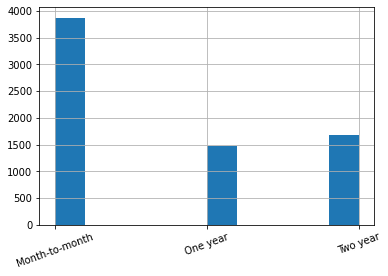

Диаграмма распределения PaperlessBilling


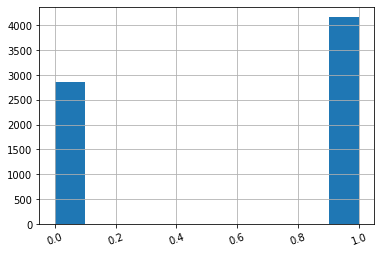

Диаграмма распределения PaymentMethod


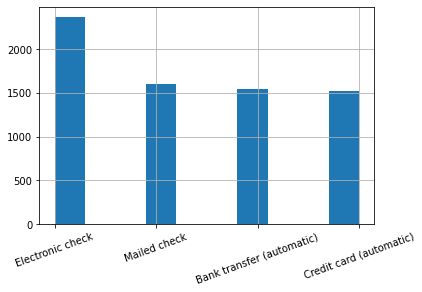

Диаграмма распределения churn


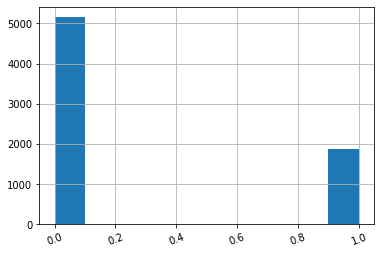

In [24]:
col_list=['Type', 'PaperlessBilling', 'PaymentMethod', 'churn']
for col in col_list:
    print(f'Диаграмма распределения {col}')
    contract[col].hist()
    plt.xticks(rotation = 20)
    plt.show()
    

In [25]:
print('Статистика для признака ежемесячной оплаты:')
display(contract.MonthlyCharges.describe())
print('Статистика для признака суммы выплат:')
display(contract.TotalCharges.describe())

Статистика для признака ежемесячной оплаты:


count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

Статистика для признака суммы выплат:


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

(10.0, 125.0)

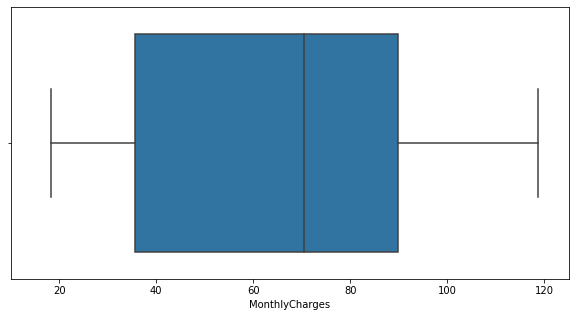

In [26]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=contract['MonthlyCharges'])
plt.xlim(10, 125)


(-1000.0, 10000.0)

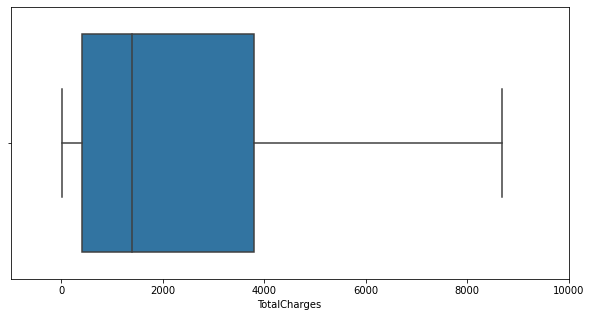

In [27]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=contract['TotalCharges'])
plt.xlim(-1000, 10000)

В обоих количественных признаках нет аномалий или выбросов, но распределение смещено влево: это логично, учитывая что помесячная оплата является самой популярной формой как для старых, так и для новых клиентов. А для целевого признака наблюдается существенный дисбаланс классов.

In [28]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int64         
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   churn             7032 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 549.4+ KB


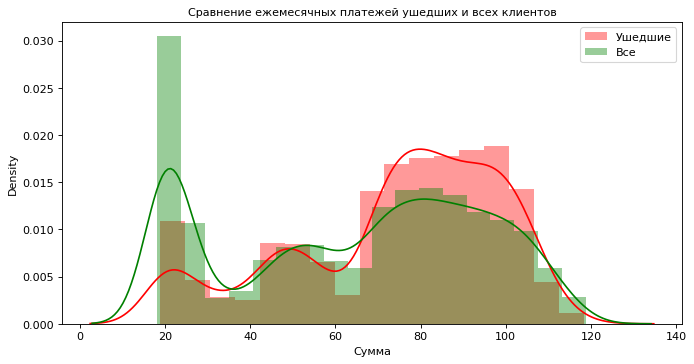

In [29]:
quits = contract.query('churn == 1')

plt.figure(figsize=(10,5), dpi= 80)
sns.distplot(quits['MonthlyCharges'], color='r', label='Ушедшие')
sns.distplot(contract['MonthlyCharges'], color='g', label='Все')

plt.title('Сравнение ежемесячных платежей ушедших и всех клиентов', fontsize=10)
plt.legend()
plt.xlabel('Сумма')
plt.show()

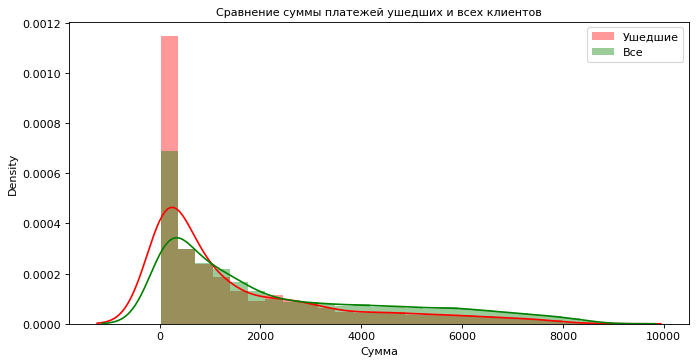

In [30]:
plt.figure(figsize=(10,5), dpi= 80)
sns.distplot(quits['TotalCharges'], color='r', label='Ушедшие')
sns.distplot(contract['TotalCharges'], color='g', label='Все')

plt.title('Сравнение суммы платежей ушедших и всех клиентов', fontsize=10)
plt.legend()
plt.xlabel('Сумма')
plt.show()

В среднем быстро уходящие клиенты платили в месяц бОльшие суммы, но в итоге, логично, отдали компании меньше денег.

**2) INTERNET**

In [31]:
info(internet, 'INTERNET, информация об интернет-услугах')

Таблица INTERNET, информация об интернет-услугах

Первые 10 строк таблицы:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


Рандомные 10 строк таблицы:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
2708,9576-SYUHJ,Fiber optic,Yes,No,No,No,Yes,No
4167,0334-ZFJSR,DSL,Yes,Yes,No,Yes,No,No
1038,5989-OMNJE,DSL,Yes,Yes,Yes,No,Yes,Yes
2975,7973-DZRKH,Fiber optic,Yes,No,Yes,Yes,No,No
4009,8010-EZLOU,Fiber optic,No,Yes,No,No,No,No
1907,7021-XSNYE,DSL,Yes,No,Yes,Yes,No,Yes
4994,3259-FDWOY,Fiber optic,No,Yes,Yes,No,Yes,Yes
116,2636-SJDOU,Fiber optic,Yes,Yes,No,No,No,No
4571,3398-ZOUAA,Fiber optic,No,No,No,No,No,No
1552,1024-VRZHF,Fiber optic,No,No,No,No,No,No


Последние 10 строк таблицы:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5507,6894-LFHLY,Fiber optic,No,No,No,No,No,No
5508,9767-FFLEM,Fiber optic,No,No,No,No,No,No
5509,0639-TSIQW,Fiber optic,Yes,Yes,Yes,No,Yes,No
5510,8456-QDAVC,Fiber optic,No,No,No,No,Yes,No
5511,7750-EYXWZ,DSL,No,Yes,Yes,Yes,Yes,Yes
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No
5516,3186-AJIEK,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


Информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


In [32]:
internet.duplicated().sum()

0

Аналогично с предыдущей таблицей, нет пропусков и дубликатов.

- `customerID`- уникальный идентификатор клиента;
- `InternetService`- тип подключения интернета (через телефонную линию (DSL) или оптоволоконный кабель;
- `OnlineSecurity`- подключенная услуга блокировки небезопасных сайтов;
- `OnlineBackup`- облачное хранилище файлов для резервного копирования данных;
- `DeviceProtection`- наличие услуги антивируса;
- `TechSupport`- выделенная линия технической поддержки;
- `StreamingTV`- подключенное стриминговое телевидение;
- `StreamingMovies`- каталог фильмов.

Так же видим много бинарных признаков, которые можно закодировать.

In [33]:
for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    internet[i] = (internet[i] == 'Yes').astype('int8')

In [34]:
internet['DLS'] = (internet['InternetService'] == 'DSL').astype('int8')


In [35]:
internet=internet.drop('InternetService', axis=1)
internet.head()

,customerID,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DLS
0,7590-VHVEG,0,1,0,0,0,0,1
1,5575-GNVDE,1,0,1,0,0,0,1
2,3668-QPYBK,1,1,0,0,0,0,1
3,7795-CFOCW,1,0,1,1,0,0,1
4,9237-HQITU,0,0,0,0,0,0,0


Диаграмма распределения OnlineSecurity


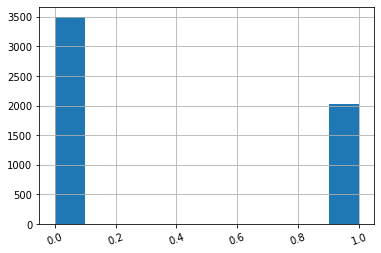

Диаграмма распределения OnlineBackup


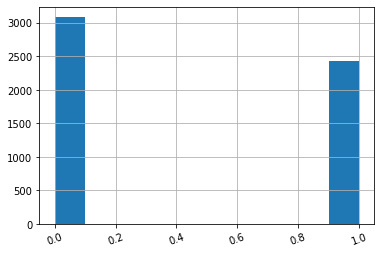

Диаграмма распределения DeviceProtection


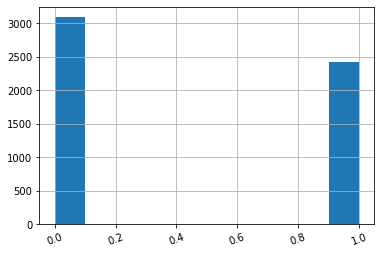

Диаграмма распределения TechSupport


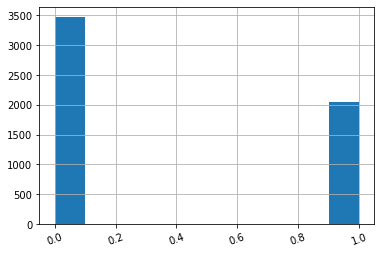

Диаграмма распределения StreamingTV


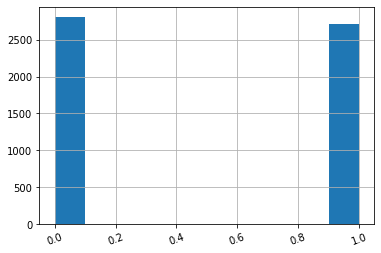

Диаграмма распределения StreamingMovies


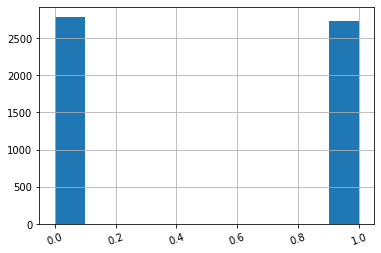

Диаграмма распределения DLS


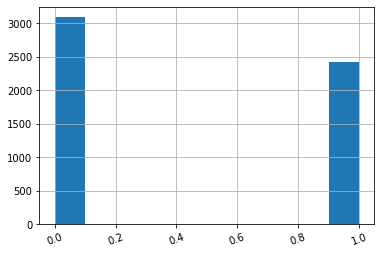

In [36]:
col_list=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','DLS']
for col in col_list:
    print(f'Диаграмма распределения {col}')
    internet[col].hist()
    plt.xticks(rotation = 20)
    plt.show()

В файле с интернет-услугами данные в признаках распределены равномерно.

**3) PERSONAL**

In [37]:
info(personal, 'PERSONAL, персональные данные клиента')

Таблица PERSONAL, персональные данные клиента

Первые 10 строк таблицы:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


Рандомные 10 строк таблицы:


,customerID,gender,SeniorCitizen,Partner,Dependents
3381,8879-ZKJOF,Female,0,No,No
6180,0201-MIBOL,Female,1,No,No
4829,1600-DILPE,Female,0,No,No
3737,8601-QACRS,Female,0,No,No
4249,7919-ZODZZ,Female,0,Yes,Yes
6835,7964-ZRKKG,Male,0,Yes,No
3869,1357-BIJKI,Male,0,Yes,No
3943,8720-RQSBJ,Male,1,No,No
3491,4682-BLBUC,Male,0,Yes,No
6847,8930-XOTDP,Female,0,Yes,Yes


Последние 10 строк таблицы:


,customerID,gender,SeniorCitizen,Partner,Dependents
7033,9767-FFLEM,Male,0,No,No
7034,0639-TSIQW,Female,0,No,No
7035,8456-QDAVC,Male,0,No,No
7036,7750-EYXWZ,Female,0,No,No
7037,2569-WGERO,Female,0,No,No
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


Информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


- `customerID`- уникальный идентификатор клиента;
- `gender`- пол;
- `SeniorCitizen`- наличие пенсионного статуса по возрасту;
- `Partner`- наличие супруга(и);
- `Dependents`- наличие иждивенцев.

In [38]:
for i in ['Partner', 'Dependents']:
    personal[i] = (personal[i] == 'Yes').astype('int8')

In [39]:
personal = pd.get_dummies(personal, columns=['gender'])
personal = personal.drop('gender_Female', axis=1)

In [40]:
personal.head()

,customerID,SeniorCitizen,Partner,Dependents,gender_Male
0,7590-VHVEG,0,1,0,0
1,5575-GNVDE,0,0,0,1
2,3668-QPYBK,0,0,0,1
3,7795-CFOCW,0,0,0,1
4,9237-HQITU,0,0,0,0


Диаграмма распределения SeniorCitizen


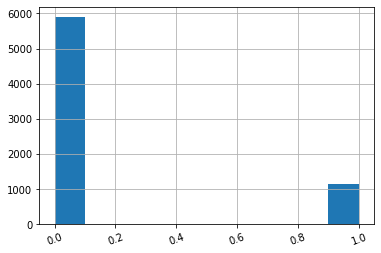

Диаграмма распределения Partner


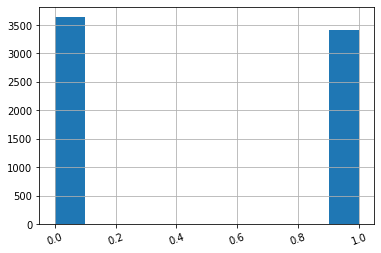

Диаграмма распределения Dependents


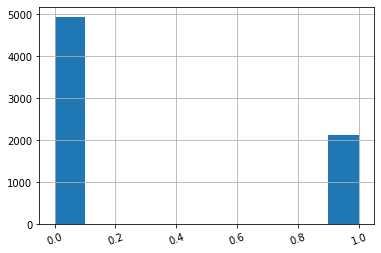

Диаграмма распределения gender_Male


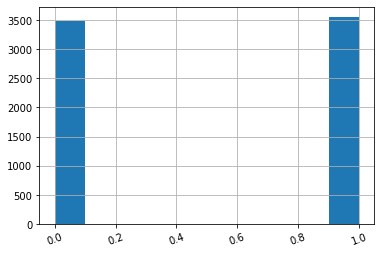

In [41]:
col_list=['SeniorCitizen','Partner','Dependents','gender_Male']
for col in col_list:
    print(f'Диаграмма распределения {col}')
    personal[col].hist()
    plt.xticks(rotation = 20)
    plt.show()

В файле с персональными данными страдает распределение признака с пенсионным статусом и признака с данными о наличии иждевенцев. В дальнейшем анализе необходимо будет проверить необходимость их наличия для обучения модели.

**4) PHONE**

In [42]:
info(phone, 'PHONE, информация об услугах телефонии.')

Таблица PHONE, информация об услугах телефонии.

Первые 10 строк таблицы:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


Рандомные 10 строк таблицы:


,customerID,MultipleLines
5732,4378-MYPGO,No
1549,6961-MJKBO,No
3687,1629-DQQVB,No
5678,4636-OLWOE,No
4358,7067-KSAZT,Yes
2968,4132-KALRO,Yes
2067,6204-IEUXJ,No
4262,3647-GMGDH,No
3689,3045-XETSH,Yes
6337,1471-GIQKQ,No


Последние 10 строк таблицы:


,customerID,MultipleLines
6351,3605-JISKB,Yes
6352,6894-LFHLY,Yes
6353,9767-FFLEM,No
6354,0639-TSIQW,Yes
6355,8456-QDAVC,No
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes
6360,3186-AJIEK,No


Информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


In [43]:
for i in ['MultipleLines']:
    phone[i] = (phone[i] == 'Yes').astype('int8')

In [44]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0
3,9305-CDSKC,1
4,1452-KIOVK,1


Диаграмма распределения MultipleLines


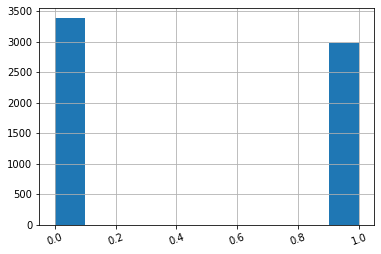

In [45]:
col_list=['MultipleLines']
for col in col_list:
    print(f'Диаграмма распределения {col}')
    phone[col].hist()
    plt.xticks(rotation = 20)
    plt.show()

Помимо таргета в таблицу CONTRACT можно добавить срок жизни клиента. Для этого вычтем `EndDate` из `BeginDate`, а в в случае действительных клиентов значение 'No' заменим на актуальную дату 1 февраля 2020.

In [46]:
contract['EndDateNew']=contract['EndDate']
contract.loc[(contract['EndDateNew'] == 'No'), 'EndDateNew'] = '2020-02-01'
contract['EndDateNew'] = pd.to_datetime(contract['EndDateNew'], format='%Y-%m-%d')

In [47]:
contract['lifespan']=(contract['EndDateNew']-contract['BeginDate']).dt.days

In [48]:
contract=contract.drop('EndDateNew', axis=1)

In [49]:
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,lifespan
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,1889.50,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,1,61


In [50]:
data_list = [contract, personal, internet, phone]
for i in data_list:
    display(i.head(3))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,lifespan
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,1889.50,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,1,61


,customerID,SeniorCitizen,Partner,Dependents,gender_Male
0,7590-VHVEG,0,1,0,0
1,5575-GNVDE,0,0,0,1
2,3668-QPYBK,0,0,0,1


,customerID,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DLS
0,7590-VHVEG,0,1,0,0,0,0,1
1,5575-GNVDE,1,0,1,0,0,0,1
2,3668-QPYBK,1,1,0,0,0,0,1


,customerID,MultipleLines
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0


Загрузили и открыли даблицы, закодировали бинарные признаки, изменили типы данных (datetime и float), создали таргет(`churn`) и признак `lifespan` - продолжительность пользования услугами.

## Исследовательский анализ.

In [51]:
print('Процент ушедших клиентов от всех:', round(((len(contract.query('churn == 1'))/contract.shape[0])*100), 2),'%')

Процент ушедших клиентов от всех: 26.58 %


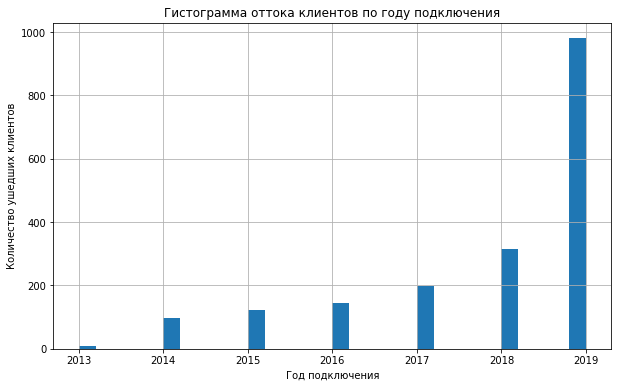

In [52]:
plt.figure(figsize=(10,6))
contract.query('churn == 1')['BeginDate'].dt.year.plot(kind='hist', bins=30, grid=True)
plt.title('Гистограмма оттока клиентов по году подключения')
plt.xlabel('Год подключения')
plt.ylabel('Количество ушедших клиентов')
plt.show()

In [53]:
contract['EndDate'].value_counts()

No                     5163
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

По таблице и подсчету значений видим, что сильный отток клиентов начался в последние четыре месяца (более 20 процентов покинули компанию за этот срок), и особенно активно уходят недавно подключившиеся пользователи.

<AxesSubplot:xlabel='lifespan', ylabel='Density'>

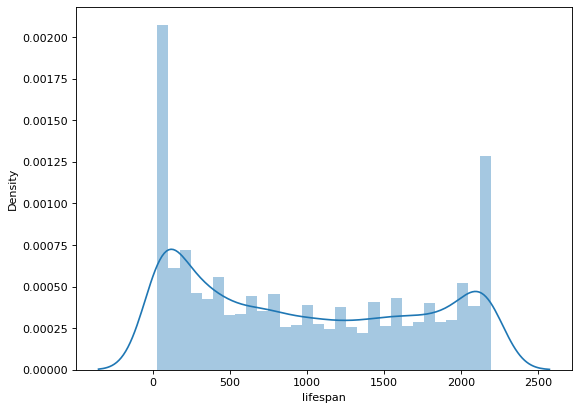

In [54]:
plt.figure(figsize=(8, 6), dpi=80)
sns.distplot(contract['lifespan'], bins=30)

Как видно, много клиентов уходят в течение 1-2x месяцев после подключения.

### Объединение таблиц. 

In [55]:
df_total = contract.merge(personal, on=['customerID'], how='left')
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int64         
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   churn             7032 non-null   int64         
 9   lifespan          7032 non-null   int64         
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   int8          
 12  Dependents        7032 non-null   int8          
 13  gender_Male       7032 non-null   uint8         
dtypes: datetime64[ns](1), fl

Далее будем присоединять таблицы с информацией об интернет-услугах  услугах телефонии. Так как не все пользователи использовали данные услуги, пропуски вобъединенной таблице будем заменять на -1, что будет означать отсутствие подключенной услуги.

In [56]:
df_total = pd.merge(df_total, internet, on ='customerID', how= 'left')
df_total = pd.merge(df_total, phone, on ='customerID', how= 'left')
df_total = df_total.fillna(-1)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   object        
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   int64         
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   churn             7032 non-null   int64         
 9   lifespan          7032 non-null   int64         
 10  SeniorCitizen     7032 non-null   int64         
 11  Partner           7032 non-null   int8          
 12  Dependents        7032 non-null   int8          
 13  gender_Male       7032 non-null   uint8         
 14  OnlineSecurity    7032 n

In [57]:
for col in ['OnlineSecurity', 'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies',
            'DLS',
            'MultipleLines']:
    df_total[col] = df_total[col].astype('int8')

In [58]:
df_total.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,lifespan,...,Dependents,gender_Male,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DLS,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85,0,31,...,0,0,0,1,0,0,0,0,1,-1
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,1889.50,0,1036,...,0,1,1,0,1,0,0,0,1,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,1,61,...,0,1,1,1,0,0,0,0,1,0
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1371,...,0,1,1,0,1,1,0,0,1,-1
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,1,61,...,0,0,0,0,0,0,0,0,0,0


Посмотрим на зависимость ухода клиентов и типа оплаты:

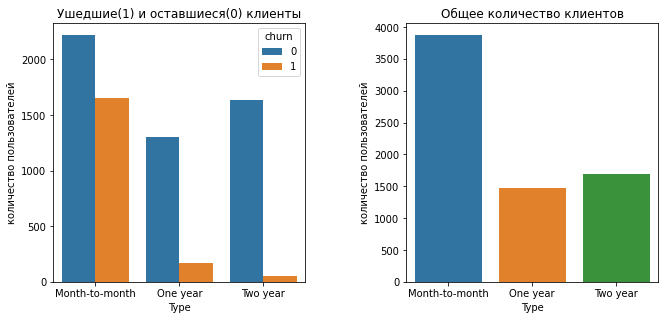

In [59]:
ax1=plt.subplot(1,2,1)
ax3=plt.subplot(1,2,2)

plot1=sns.countplot(x='Type', hue="churn" , data=df_total, ax = ax1)
plot1.set_title('Ушедшие(1) и оставшиеся(0) клиенты')
plot1.set_ylabel('количество пользователей')
plot2=sns.countplot(x='Type', data=df_total, ax = ax3)
plot2.set_title('Общее количество клиентов')
plot2.set_ylabel('количество пользователей')
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1.5, hspace=1, wspace=0.4)

plt.show()

Большинство ушедших клиентов выбирали помесячную оплату, и очень редко более долгие платежные обязательства. Но в целом ежемесячный тип оплаты является самым популярным среди клиентов.

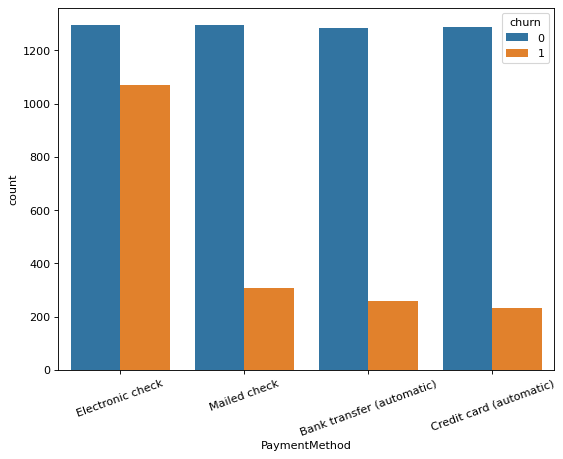

In [60]:
plt.figure(figsize=(8, 6), dpi=80)
sns.countplot(x='PaymentMethod', hue='churn', data=df_total)
plt.xticks(rotation=20)
plt.show()

Отказавшиеся от услуг клиенты чаще выбирали оплату Electronic check. Вероятно, это связано с тем, что такая оплата не автоматическая, и у клиента есть возможно всегда отказаться от оплаты.

<AxesSubplot:xlabel='DLS', ylabel='count'>

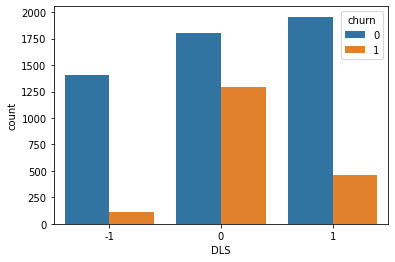

In [61]:
sns.countplot(x='DLS', hue='churn', data=df_total)

Покинувшие компанию клиенты чаще использовали оптоволокно для подключения к интернету.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

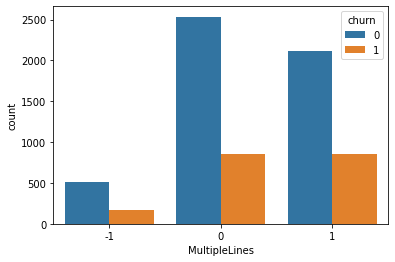

In [62]:
sns.countplot(x='MultipleLines', hue='churn', data=df_total)

Как видно, ушедшие клиенты чаще пользовались интернетом и услугами телефонии, то есть от даты подключения до отказа от услуг у них была возможность попробовать предлагаемые планы компании.

### План.

1. Анализ и предобработка данных:
   обработка дубликатов и пропусков, их обработка, изменение типов данных, кодирование бинароных принаков, выделение таргета, объединение таблиц в одну.
2. Исследовательский анализ данных: сравнение распределения ежемесячных платежей и выплаченной суммы ушедших и всех клиентов, построение графиков для отображения зависимости целевого признака от типа оплаты и способа подключения к интернету, анализ жизненного цикла клиента.
3. Подготовка к обучению: разделение на выборки, масштабирование количественных признаков, кодирование категориальных, удаление малоинформативных признаков. 
4. Обучение моделей: обучить и сравнить несколько моделей на кросс валидации, выбрать наилучший результат.
5. Тестирование моделей: тестирование наилучшей модели.
6. Общий вывод.

## Подготовка данных к обучению.

In [63]:
df_total.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,lifespan,...,Dependents,gender_Male,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DLS,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85,0,31,...,0,0,0,1,0,0,0,0,1,-1
1,5575-GNVDE,2017-04-01,No,One year,0,Mailed check,56.95,1889.50,0,1036,...,0,1,1,0,1,0,0,0,1,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,1,61,...,0,1,1,1,0,0,0,0,1,0
3,7795-CFOCW,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1371,...,0,1,1,0,1,1,0,0,1,-1
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,1,61,...,0,0,0,0,0,0,0,0,0,0


Сразу видно, что можно удалить столбцы `customerID` и `BeginDate` c `EndDate`. Первый не информативен для модели, а два последних будут создавать утечку целевого признака, так как он был создан на их данных, как и признак `lifespan`.

In [64]:
df_total=df_total.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)
df_total.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,lifespan,SeniorCitizen,Partner,Dependents,gender_Male,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DLS,MultipleLines
0,Month-to-month,1,Electronic check,29.85,29.85,0,31,0,1,0,0,0,1,0,0,0,0,1,-1
1,One year,0,Mailed check,56.95,1889.50,0,1036,0,0,0,1,1,0,1,0,0,0,1,0
2,Month-to-month,1,Mailed check,53.85,108.15,1,61,0,0,0,1,1,1,0,0,0,0,1,0
3,One year,0,Bank transfer (automatic),42.30,1840.75,0,1371,0,0,0,1,1,0,1,1,0,0,1,-1
4,Month-to-month,1,Electronic check,70.70,151.65,1,61,0,0,0,0,0,0,0,0,0,0,0,0


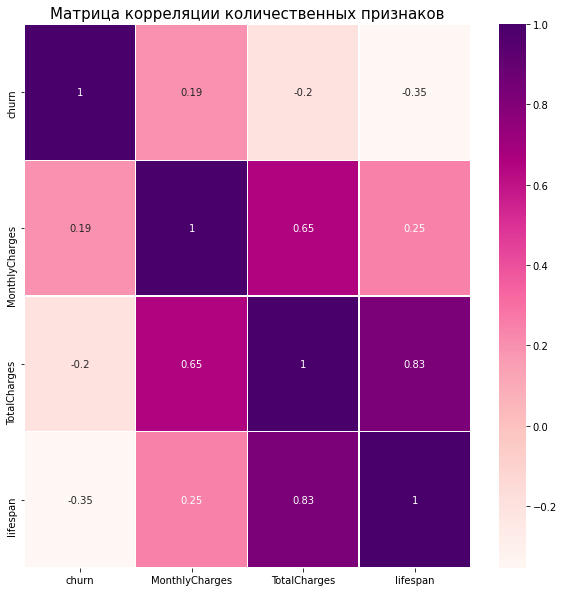

In [65]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Матрица корреляции количественных признаков', fontsize=15)
sns.heatmap(df_total[['churn', 'MonthlyCharges', 'TotalCharges', 'lifespan']].corr(), cmap='RdPu', linewidths=.2, cbar=True, annot=True, ax=ax)
plt.show()

Видим, что сильная корреляция наблюдается между продолжительностью жизни клиента `lifespan` и суммой всех выплат `TotalCharges`. Последний в свою очередь имеет корреляцию 0.65 с признаком `MonthlyCharges`. Признаки кажутся взаимозаменяемыми, проверим, так ли это.

In [66]:
df_total['month_count'] = round(df_total['TotalCharges']/df_total['lifespan']*31, 2)
df_total[['month_count', 'MonthlyCharges']]

,month_count,MonthlyCharges
0,29.85,29.85
1,56.54,56.95
2,54.96,53.85
3,41.62,42.30
4,77.07,70.70
...,...,...
7027,84.53,84.80
7028,104.18,103.20
7029,31.87,29.60
7030,77.27,74.40


Наглядно убедились, что можно "вытащить" `TotalCharges` из помесячной оплаты и срока жизни клиента, поэтому ввиду его сильно корреляции удалим его. 

In [67]:
df_total = df_total.drop(['month_count', 'TotalCharges'], axis=1)
df_total.head(3)

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,churn,lifespan,SeniorCitizen,Partner,Dependents,gender_Male,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DLS,MultipleLines
0,Month-to-month,1,Electronic check,29.85,0,31,0,1,0,0,0,1,0,0,0,0,1,-1
1,One year,0,Mailed check,56.95,0,1036,0,0,0,1,1,0,1,0,0,0,1,0
2,Month-to-month,1,Mailed check,53.85,1,61,0,0,0,1,1,1,0,0,0,0,1,0


У нас остались незакодированные категориальные признаки `Type` и `PaymentMethod`, которые можно закодировать аналогично бинарным, чтобы не создавать много признаков.

In [68]:
def type_coder(paytype):
    if paytype == 'Month-to-month' :
        res = -1
    elif paytype == 'One year' :
        res = 0
    elif paytype == 'Two year' :
        res = 1
    return res
df_total['Type'] = df_total['Type'].apply(type_coder).astype('int8')

In [69]:
def pay_method_coder(paymethod):
    if paymethod == 'Electronic check' :
        res = -1
    elif paymethod == 'Mailed check' :
        res = 0
    elif paymethod == 'Credit card (automatic)' :
        res = 1
    elif paymethod == 'Bank transfer (automatic)':
        res = 2
    return res
df_total['PaymentMethod'] = df_total['PaymentMethod'].apply(pay_method_coder).astype('int8')

In [70]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   int8   
 1   PaperlessBilling  7032 non-null   int64  
 2   PaymentMethod     7032 non-null   int8   
 3   MonthlyCharges    7032 non-null   float64
 4   churn             7032 non-null   int64  
 5   lifespan          7032 non-null   int64  
 6   SeniorCitizen     7032 non-null   int64  
 7   Partner           7032 non-null   int8   
 8   Dependents        7032 non-null   int8   
 9   gender_Male       7032 non-null   uint8  
 10  OnlineSecurity    7032 non-null   int8   
 11  OnlineBackup      7032 non-null   int8   
 12  DeviceProtection  7032 non-null   int8   
 13  TechSupport       7032 non-null   int8   
 14  StreamingTV       7032 non-null   int8   
 15  StreamingMovies   7032 non-null   int8   
 16  DLS               7032 non-null   int8   


Выделим таргет и признаки:

In [71]:
X = df_total.drop(columns=['churn'])
y = df_total['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
print('Размер обучающей выборки: ', X_train.shape,  y_train.shape)
print('Размер тестовой выборки: ', X_test.shape,  y_test.shape)

Размер обучающей выборки:  (4922, 17) (4922,)
Размер тестовой выборки:  (2110, 17) (2110,)


Масштабируем количественные признаки:

In [72]:
numeric = ['MonthlyCharges', 'lifespan']

scaler = StandardScaler()
scaler.fit(X_train[numeric])

X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

display(X_train.head(3))
display(X_test.head(3))

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,lifespan,SeniorCitizen,Partner,Dependents,gender_Male,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DLS,MultipleLines
612,0,1,1,1.501044,0.478159,1,0,0,0,1,1,1,0,1,1,0,1
6582,-1,1,1,0.184885,-1.239276,0,0,0,1,0,0,0,0,0,0,0,0
2216,1,0,1,-0.004313,1.583280,0,1,1,0,1,1,1,1,0,0,1,0


,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,lifespan,SeniorCitizen,Partner,Dependents,gender_Male,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DLS,MultipleLines
5193,0,1,-1,-1.457023,-0.950575,0,0,0,1,-1,-1,-1,-1,-1,-1,-1,0
2012,1,0,2,-1.440571,0.232428,0,1,0,1,-1,-1,-1,-1,-1,-1,-1,0
81,-1,0,-1,-0.448516,-0.868665,0,1,1,0,1,0,0,0,1,1,1,-1


## Подбор параметров и тестирование лучших моделей.

### RandomForest

In [73]:
%%time

rf_param_grid={'max_depth': [3,7,9, 13],
                   'class_weight':['balanced', None],
                   'n_estimators': [300, 500, 700],
                   'min_samples_leaf': [2, 4, 6]}

rf = RandomForestClassifier(random_state=RANDOM_STATE)

gs_rf = GridSearchCV(rf, rf_param_grid, cv = 3, verbose = 1, n_jobs=-1, scoring = 'roc_auc')
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
CPU times: user 4min 27s, sys: 1.46 s, total: 4min 29s
Wall time: 4min 30s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=80822),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [3, 7, 9, 13],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [300, 500, 700]},
             scoring='roc_auc', verbose=1)

### LogisticRegression

In [74]:
%%time
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'class_weight':['balanced', None],
              'penalty':['l1','l2']}

lr = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=RANDOM_STATE)

lr_gs = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc')
lr_gs.fit(X_train, y_train)

CPU times: user 11.1 s, sys: 13 s, total: 24.1 s
Wall time: 24.1 s


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=80822),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [75]:
results = pd.DataFrame({'Модель':['Случайный лес', 'Линейная регрессия'], 
        'ROC-AUC на cv без учета баланса классов': [round(gs_rf.best_score_, 3), round(lr_gs.best_score_, 3)],})

results

,Модель,ROC-AUC на cv без учета баланса классов
0,Случайный лес,0.856
1,Линейная регрессия,0.836


Лучшие модели дают спорный результат и не учитывают дисбаланс классов. Попробуем самостоятельно выровнять классы.

In [76]:
def upsample(X, y, repeat):     
    X_zeros = X[y == 0]     
    X_ones = X[y == 1]     
    y_zeros = y[y == 0]     
    y_ones = y[y == 1] 

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)     
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)     
    
    X_upsampled, y_upsampled = shuffle(         
        X_upsampled, y_upsampled, random_state=RANDOM_STATE)          
    
    return X_upsampled, y_upsampled

In [77]:
X_train_up, y_train_up = upsample(X_train, y_train, 3)

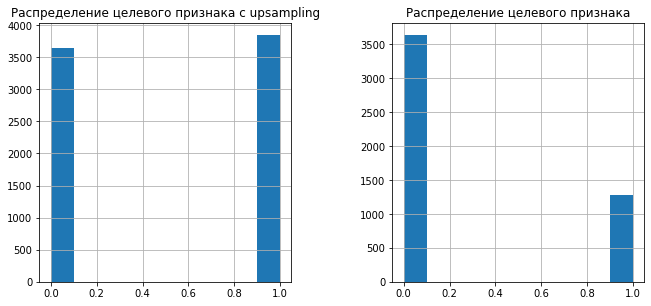

In [78]:

    plt.figure(1)
    ax1 = plt.subplot2grid((1,2), (0,0))
    ax1= y_train_up.hist()
    ax1.set_title('Распределение целевого признака c upsampling')


    ax3 = plt.subplot2grid((1,2), (0,1))
    ax3 = y_train.hist()
    ax3.set_title('Распределение целевого признака')
    plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1.5, hspace=1, wspace=0.4)
    plt.show()


In [79]:
rf_best = RandomForestClassifier(**gs_rf.best_params_, random_state=RANDOM_STATE)
rf_best.fit(X_train_up, y_train_up)


roc_auc_rf_up=cross_val_score(rf_best, X_train_up, y_train_up, cv=3, scoring='roc_auc').mean()
roc_auc_rf_up

0.9017145929782858

In [80]:
lr_best = LogisticRegression(**lr_gs.best_params_, random_state=RANDOM_STATE)
lr_best.fit(X_train_up, y_train_up)


roc_auc_lr_up=cross_val_score(lr_best, X_train_up, y_train_up, cv=3, scoring='roc_auc').mean()
roc_auc_lr_up

0.8377627902732813

In [81]:
results = pd.DataFrame({'Модель':['Случайный лес', 'Линейная регрессия'], 
        'ROC-AUC на cv с дисбалансом классов': [round(gs_rf.best_score_, 3), round(lr_gs.best_score_, 3)],
                        'ROC_AUC на cv upsample': [round(roc_auc_rf_up, 3), round(roc_auc_lr_up, 3)]})

results

,Модель,ROC-AUC на cv с дисбалансом классов,ROC_AUC на cv upsample
0,Случайный лес,0.856,0.902
1,Линейная регрессия,0.836,0.838


Протестируем модель RandomForest, которая показала высокий ROC_AUC на выборке с балансом классов.

ROC-AUC : 0.86
Accuracy : 76.40%


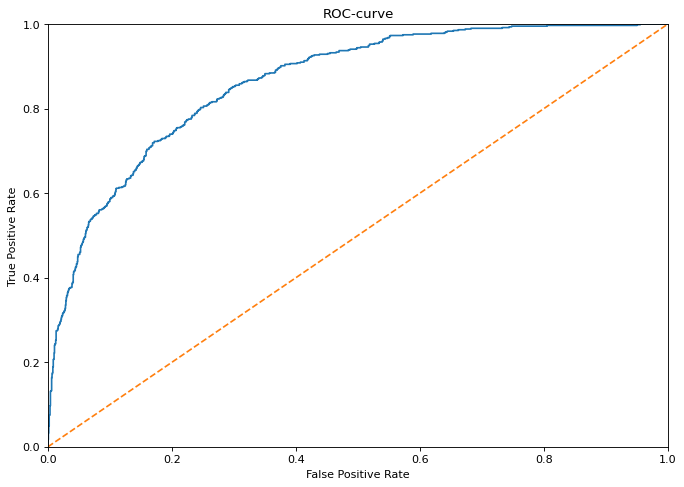

In [82]:
print('ROC-AUC : {:.2f}'.format(roc_auc_score(y_test,
                                        rf_best.predict_proba(X_test)[:, 1])))
print('Accuracy : {:.2%}'.format(accuracy_score(y_test,
                                                rf_best.predict(X_test))))

def make_roc_curve(y_test, pred_test):
    fpr, tpr, thresholds = roc_curve(y_test, pred_test)

    plt.figure(figsize=(10, 7), dpi=80)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve')
    plt.show()
    
make_roc_curve(y_test, rf_best.predict_proba(X_test)[:, 1])

На тестовой выборке модель показывает себя хуже: скорее всего, upsample привел к переобучению на тренировочных данных.

### CatBoost

In [83]:
param_grid = {
    'learning_rate': [0.1, 0.3],
    'iterations': [50, 100],
    'l2_leaf_reg': [3, 9]
}

cat = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)

cat_gs = GridSearchCV(cat, param_grid, cv=5, scoring='roc_auc')
cat_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f021c0b3e50>,
             param_grid={'iterations': [50, 100], 'l2_leaf_reg': [3, 9],
                         'learning_rate': [0.1, 0.3]},
             scoring='roc_auc')

In [84]:
cat_gs.best_score_

0.8840998780372109

In [85]:
cat_gs.best_params_

{'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.3}

In [86]:
cat_best=CatBoostClassifier(**cat_gs.best_params_, random_state=RANDOM_STATE, verbose=0)
cat_best.fit(X_train, y_train)

ROC-AUC : 0.904
Accuracy : 84.79%


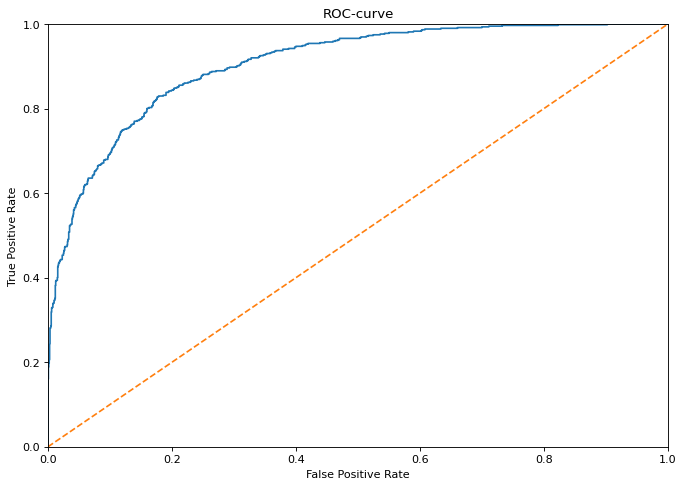

In [87]:
print('ROC-AUC : {:.3f}'.format(roc_auc_score(y_test,
                                        cat_best.predict_proba(X_test)[:, 1])))
print('Accuracy : {:.2%}'.format(accuracy_score(y_test,
                                                cat_best.predict(X_test))))
make_roc_curve(y_test, cat_best.predict_proba(X_test)[:, 1])

### LightGBM

In [88]:
%%time 
lgbm_params = [{'max_depth': [5, 10],
               'learning_rate': [0.1, 0.05],
               'n_estimators': [800, 900],
               'class_weight':[None,'balanced']}]

lgbm = LGBMClassifier(random_state=RANDOM_STATE)


lgbm_gs = GridSearchCV(lgbm, param_grid=lgbm_params, scoring='roc_auc', 
                   cv=3, verbose=0)
lgbm_gs.fit(X_train, y_train)

CPU times: user 4min 59s, sys: 2.33 s, total: 5min 1s
Wall time: 5min 4s


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=80822),
             param_grid=[{'class_weight': [None, 'balanced'],
                          'learning_rate': [0.1, 0.05], 'max_depth': [5, 10],
                          'n_estimators': [800, 900]}],
             scoring='roc_auc')

In [89]:
lgbm_gs.best_score_

0.8915758410204049

In [90]:
lgbm_gs.best_params_

{'class_weight': None,
 'learning_rate': 0.05,
 'max_depth': 5,
 'n_estimators': 800}

In [91]:
lgbm_best=LGBMClassifier(**lgbm_gs.best_params_, verbose=-1, random_state=RANDOM_STATE)
lgbm_best.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05, max_depth=5, n_estimators=800,
               random_state=80822, verbose=-1)

ROC-AUC : 0.914
Accuracy : 86.07%


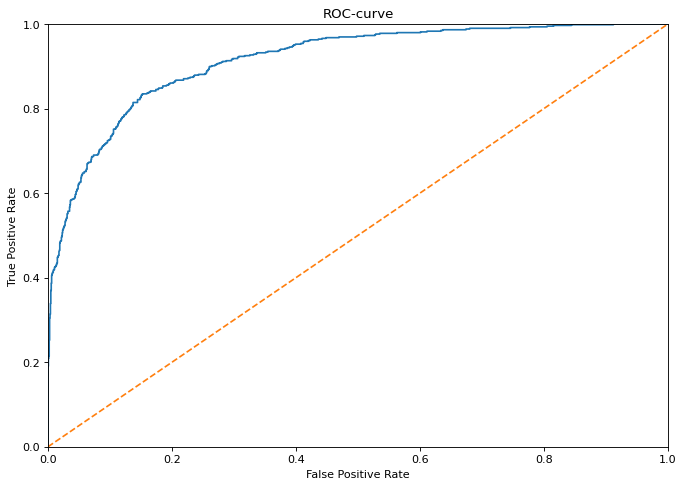

In [92]:
print('ROC-AUC : {:.3f}'.format(roc_auc_score(y_test,
                                        lgbm_best.predict_proba(X_test)[:, 1])))
print('Accuracy : {:.2%}'.format(accuracy_score(y_test,
                                                lgbm_best.predict(X_test))))
make_roc_curve(y_test, lgbm_best.predict_proba(X_test)[:, 1])

In [93]:
roc_test_rf=round(roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1]), 3)
roc_test_cat=round(roc_auc_score(y_test, cat_best.predict_proba(X_test)[:, 1]), 3)
roc_test_lgbm=round(roc_auc_score(y_test, lgbm_best.predict_proba(X_test)[:, 1]),3)

acc_rf=round(accuracy_score(y_test, rf_best.predict(X_test)), 3)
acc_lr=round(accuracy_score(y_test, lr_best.predict(X_test)), 3)
acc_cat=round(accuracy_score(y_test, cat_best.predict(X_test)), 3)
acc_lgbm=round(accuracy_score(y_test, lgbm_best.predict(X_test)),3)              

results = pd.DataFrame({'Модель':['Случайный лес', 'Линейная регрессия', 'CatBoost', 'LGBM'], 
        'ROC-AUC на cv с дисбалансом классов': [round(gs_rf.best_score_, 3), round(lr_gs.best_score_, 3), round(cat_gs.best_score_, 3), round(lgbm_gs.best_score_, 3)],
                        'ROC_AUC на cv upsample': [round(roc_auc_rf_up, 3), round(roc_auc_lr_up, 3), '-', '-'],
                       'ROC_AUC на тесте': [roc_test_rf, '-', roc_test_cat, roc_test_lgbm],
                       'Accuracy': [acc_rf, acc_lr, acc_cat, acc_lgbm]})

results

,Модель,ROC-AUC на cv с дисбалансом классов,ROC_AUC на cv upsample,ROC_AUC на тесте,Accuracy
0,Случайный лес,0.856,0.902,0.863,0.764
1,Линейная регрессия,0.836,0.838,-,0.736
2,CatBoost,0.884,-,0.904,0.848
3,LGBM,0.892,-,0.914,0.861


In [94]:
boost = lgbm_best.booster_
df_feature_importance = (
    pd.DataFrame({
        'feature': boost.feature_name(),
        'importance': boost.feature_importance(),
    })
    .sort_values('importance', ascending=False)
)
df_feature_importance

,feature,importance
4,lifespan,5690
3,MonthlyCharges,4403
2,PaymentMethod,876
0,Type,542
8,gender_Male,506
5,SeniorCitizen,327
16,MultipleLines,300
1,PaperlessBilling,288
9,OnlineSecurity,261
6,Partner,253


Лучшие результаты по метрике AUC_ROC показала модель **LightGBM**.
Удалось добиться AUC_ROC **0.914** и accuracy **86%**. Недостаток модели-долгий подбор параметров.
Самыми важными признаками для модели оказались срок жизни клиента и помесячная оплата.

## Отчет по решению.

**1. Какие пункты плана были выполнены, а какие — нет (поясните почему)?**

Были выполнены все пункты плана:
1. Анализ и предобработка
- дубликатов в данных не оказалось, вместо NaN в столбце `TotalCharges` нашлись строки с пробелами вместо значений (11 строк), они были удалены;
- изменены типы данных столбцов `BeginDate` (на _datetime_) и `TotalCharges` (на _float_);
- из столбца `EndDate` выделен целевой признак - столбец `churn` и важный признак `lifespan`(срок жизни клиента);
- бинарные признаки закодированы: значения 'YES'/'NO' преобразованы в 1 и 0 в столбцах `PaperlessBilling`, `SeniorCitizen`,	`Partner`, `Dependents`, `gender_Male`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`,	`StreamingMovies`, `DLS`, `MultipleLines`.
- таблицы объьеденены методом merge() способом 'left', чтобы в итоговой таблице остались все уникальные id клиентов.

2. ИАД
- построили гистограмы для бинарных признаков: все оказались более или менее сбалансированы;
- по таблице и подсчету значений увидели, что сильный отток клиентов начался в последние четыре месяца (более 20 процентов покинули компанию за этот срок), и особенно активно уходили недавно подключившиеся пользователи;
- согласно построенным графикам, отказавшиеся от услуг клиенты чаще выбирали оплату Electronic check, помесячную оплату, и в большинстве своем пользовались услугами интернета и телефонии. Кроме того, их помесячные платежи были больше, чем у оставшихся клиентов;

3. Подготовка данных к обучению
- удалены столбцы `customerID` и `BeginDate` c `EndDate` для избежания утечки тагрета и переобучения модели;
- после изучения матрицы корреляции числовых признаков обнаружили мультиколлинеарность, и удалили признак `TotalCharges`;
- выделили target и features, масштабировали числовые признаки с помощью StandardScaler

4. Обучение моделей:
- с помощью GridSearch были подобраны гиперпараметры для моделей RandomForestClassifier, LogisticRegression, CatBoostClassifier, LGBMClassifier.

**2. Какие трудности возникли и как вы их преодолели?**


Возникла трудность с несбалансированным распределением целевого признака. При попытке самостоятельно его выровнять, модель переобучалась, но в итоге лучшие показатели и требуемые метрики были достигнуты без уделения внимания дисбалансу классов.

**3. Какие ключевые шаги в решении задачи выделили?**


См. п.**1**.

**4. Какая ваша итоговая модель и какое у неё качество?**

In [104]:
res = pd.DataFrame({'Модель':['RandomForest', 'LinearRegression', 'CatBoost', 'LGBM'], 
        'best_params': [gs_rf.best_params_, lr_gs.best_params_, cat_gs.best_params_, lgbm_gs.best_params_],
          'best_score': [round(gs_rf.best_score_,3), round(lr_gs.best_score_,3), round(cat_gs.best_score_,3), round(lgbm_gs.best_score_,3)]})

res.set_index('Модель')

,best_params,best_score
Модель,,
RandomForest,"{'class_weight': None, 'max_depth': 9, 'min_sa...",0.856
LinearRegression,"{'C': 10, 'class_weight': None, 'penalty': 'l2'}",0.836
CatBoost,"{'iterations': 100, 'l2_leaf_reg': 3, 'learnin...",0.884
LGBM,"{'class_weight': None, 'learning_rate': 0.05, ...",0.892


Итоговой моделью выбрали **LGBMClassifier**. На кросс-валидации она показала метрику ROC_AUC = **0.892**, а на тестовых данных ROC_AUC = **0.914**. 